# Min-Max Normalized PSTH Heatmap Analysis (Digital Input Version)

- **Y-axis**: Units (can be sorted by firing rate or in ascending order)
- **X-axis**: Time relative to interval start (ms)
- **Color**: Min-Max normalized firing rate (scaled between 0 and 1)

## Min-Max Normalization Formula
**N = (F - Min) / (Max - Min)**
- **N** = normalized value (between 0 and 1)
- **F** = firing rate of an individual bin
- **Min** = minimum firing rate of a unit (considers all bins)
- **Max** = maximum firing rate of a unit (considers all bins)

## Unit Sorting Options
- **Default** (sort_by_firing_rate=False): Units displayed in ascending numerical order
- **Firing Rate Sorted** (sort_by_firing_rate=True): Units sorted by total firing rate (sum of all bins) in descending order - most active units at the top

In [1]:
# Import required modules
import sys
import os
sys.path.append('.')

# Force reload of the module to pick up new changes
import importlib
if 'min_max' in sys.modules:
    importlib.reload(sys.modules['min_max'])

import min_max
from min_max import (
    create_multiple_duration_normalized_heatmaps,
    analyze_units_by_max_normalized_value
)
import matplotlib.pyplot as plt

In [5]:
# Configuration Parameters

# Data files (adjust paths as needed)
spikes_file = '../../../../Data/040425/spikes.csv'
digitalin_file = '../../../../Data/040425/digitalin.dat'  # Changed from CSV to DAT file
spikes_path = os.path.abspath(spikes_file)
digitalin_path = os.path.abspath(digitalin_file)

# Digital input parameters
sampling_rate = 30000         # Sampling rate in Hz
pico_channel = 0              # Channel for pico intervals (0-15)

# Analysis parameters
durations_ms = [5, 10, 25]        # Interval durations to analyze (ms)
units = None                      # Units to include (None = all units)
bin_size_ms = 0.1                 # Bin size in milliseconds
pre_interval_ms = 5               # Time before interval start (ms)
post_interval_ms = 10             # Time after interval END (ms)
smooth_window = 10                #  Smoothing window (bins)
sort_by_firing_rate = False       # Sort units by total firing rate (descending)

# Output settings
save_plots = True
output_dir = '../../../../Output/040425/min_max_normalized_heatmaps_digitalin'


--- Processing normalized heatmap for duration: 5ms ---
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from digitalin.dat: /home/wanglab/spike-analysis/Data/040425/digitalin.dat
Loading digital input data from: /home/wanglab/spike-analysis/Data/040425/digitalin.dat
Number of samples: 27277056
Loaded 27277056 samples at 30000 Hz
Recording duration: 909.24 seconds
Extracting TTL events from channel 0
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
The TTL duration appears to be 300.0 samples
Found 28336 TTL events on channel 0
Event durations: 10.48 ± 7.19 ms
First 5 events:
  Event 1: 244.912833s - 244.937800s (24.97ms)
  Event 2: 244.962833s - 244.987800s (24.97ms)
  Event 3: 245.012833s - 245.037833s (25.00ms)
  Event 4: 245.062833s - 245.087833s (25.00ms)

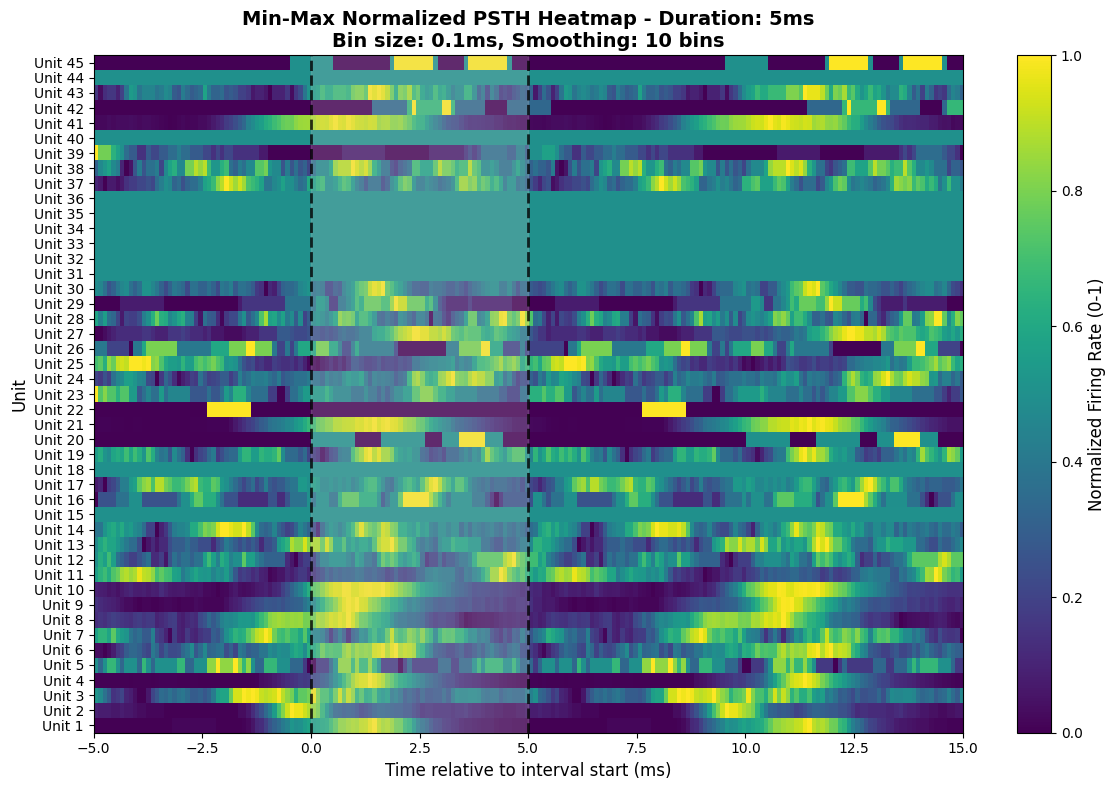

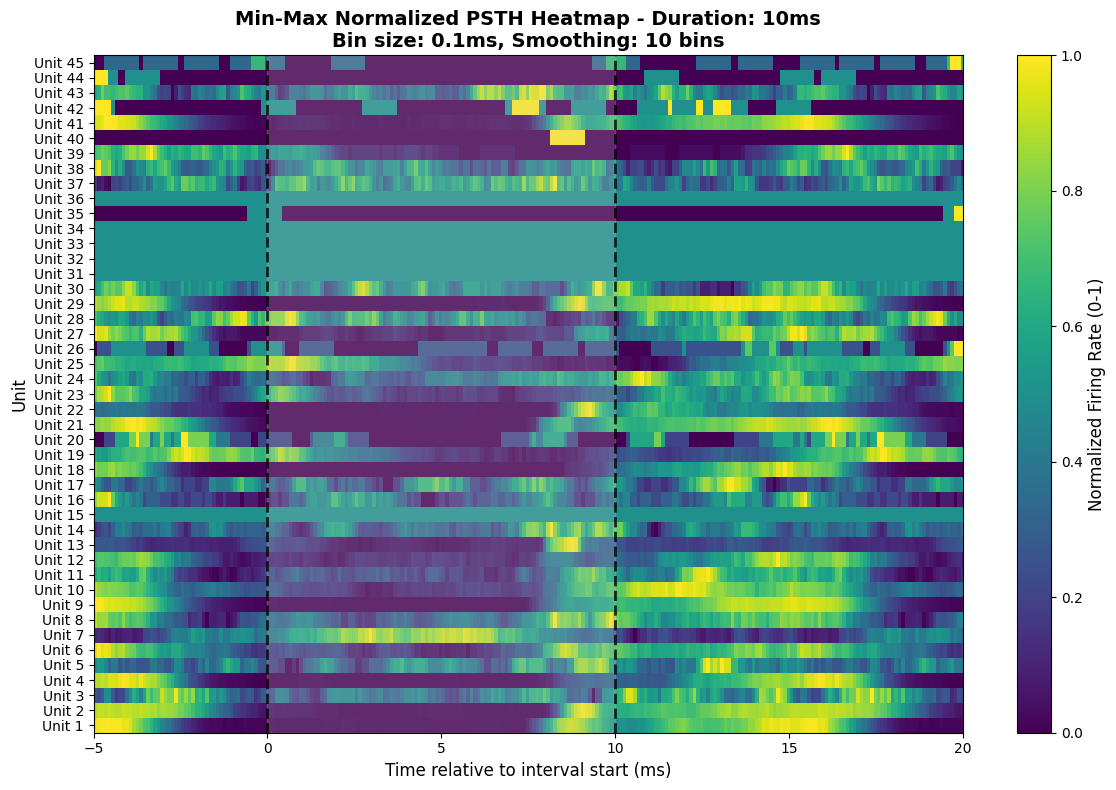

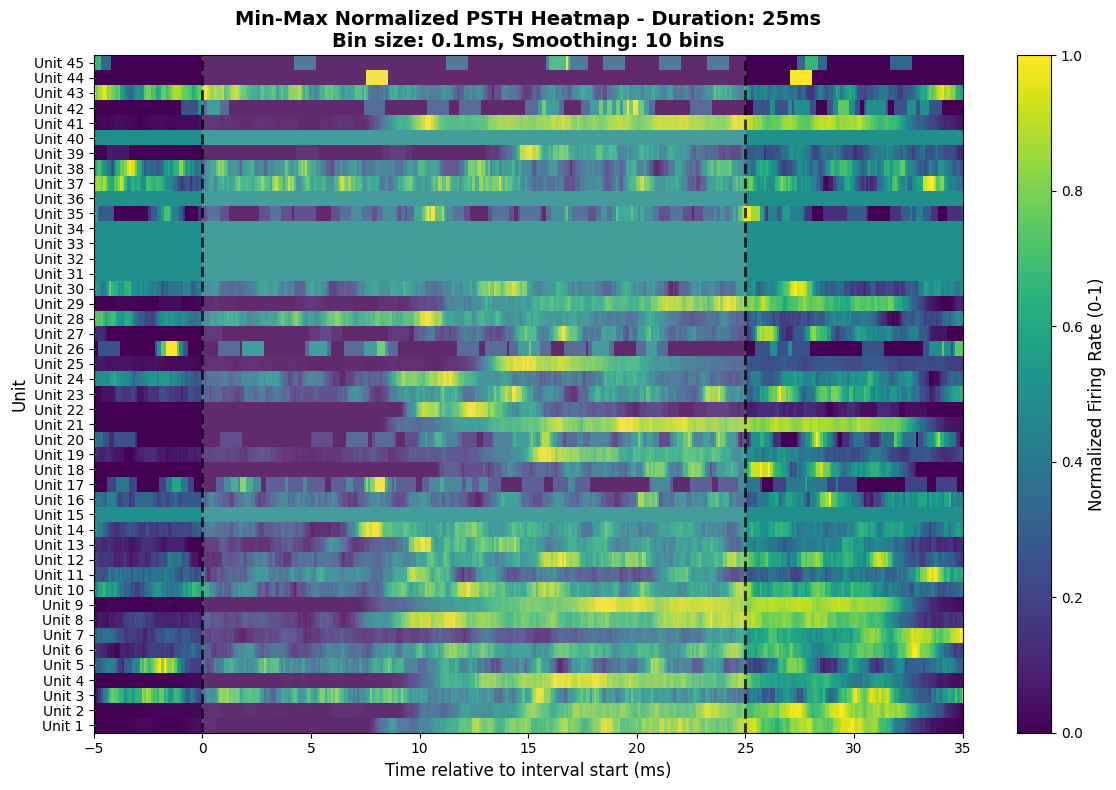

In [6]:
# Create Min-Max Normalized PSTH heatmaps for all specified durations

save_dir = output_dir if save_plots else None

results = create_multiple_duration_normalized_heatmaps(
    spikes_file=spikes_path,
    digitalin_file=digitalin_path,  # Changed from intervals_file to digitalin_file
    durations_ms=durations_ms,
    units=units,
    bin_size_ms=bin_size_ms,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    sort_by_firing_rate=sort_by_firing_rate,
    save_dir=save_dir,
    sampling_rate=sampling_rate,    # Added digitalin-specific parameters
    pico_channel=pico_channel
)

# Show the plots
plt.show()

In [7]:
# Analyze units by their mean normalized values (since max is always 1.0 in min-max normalization)
unit_rankings = analyze_units_by_max_normalized_value(results, display_results=True)


=== Duration: 5ms ===
Units ordered by highest mean normalized value:
Rank	Unit	Mean Normalized
-----------------------------------
 1	Unit 38	   0.526
 2	Unit 14	   0.516
 3	Unit 17	   0.514
 4	Unit  3	   0.502
 5	Unit 15	   0.500
 6	Unit 18	   0.500
 7	Unit 31	   0.500
 8	Unit 32	   0.500
 9	Unit 33	   0.500
10	Unit 34	   0.500
11	Unit 35	   0.500
12	Unit 36	   0.500
13	Unit 40	   0.500
14	Unit 44	   0.500
15	Unit 37	   0.489
16	Unit 19	   0.487
17	Unit  7	   0.478
18	Unit 13	   0.471
19	Unit  5	   0.468
20	Unit 26	   0.461
21	Unit 28	   0.459
22	Unit 25	   0.458
23	Unit  6	   0.450
24	Unit 23	   0.447
25	Unit 12	   0.443
26	Unit 24	   0.437
27	Unit 16	   0.436
28	Unit 11	   0.436
29	Unit 43	   0.435
30	Unit 41	   0.395
31	Unit  8	   0.390
32	Unit 30	   0.387
33	Unit 27	   0.377
34	Unit 21	   0.359
35	Unit 10	   0.350
36	Unit  9	   0.287
37	Unit  1	   0.268
38	Unit 45	   0.250
39	Unit 29	   0.246
40	Unit  4	   0.212
41	Unit  2	   0.209
42	Unit 20	   0.200
43	Unit 39	   0.174
44	Unit